In [1]:
import pandas as pd
import numpy as np


In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

In [4]:
import plotly.express as px

#colores2 = px.colors.sequential.swatches()
#colores2.show()

In [2]:
## Impote de bases de datos Elca 2013 ###
# PATH : RUTA EN LA QUE TIENE GUARADA LA BASE DE DATOS (((siempre con los slash hacia la derecha /)))/ #¡¡¡Dejar el último slash / !!!
urb_hog_13 = pd.read_stata("D:/maestria_ciencias_economicas_unal/tesis_scarring/base datos/ELCA_2013/ELCA_2013_urbano/UHogar_2013.dta")



In [4]:
#del comando para borrar objetos.
urb_hog_13["llave"].duplicated().sum()


In [178]:
urb_hog_13.shape

(4910, 468)

In [25]:
urb_hog_13.columns.to_list()

['ola',
 'zona',
 'zona_2010',
 'region',
 'RegionLb',
 'id_depto',
 'id_mpio',
 'id_mpioU',
 'consecutivo_c',
 'consecutivo',
 'hogar',
 'llave',
 'estrato',
 't_personas',
 'tipo_vivienda',
 'material_paredes',
 'material_pisos',
 'sp_energia',
 'sp_gasnatural',
 'sp_acueducto',
 'sp_alcantarillado',
 'sp_telefono',
 'sp_recoleccion_basura',
 'n_television_cable',
 'n_internet',
 'sp_estrato',
 'eliminan_basura',
 't_hogares',
 't_cuartos_hogar',
 't_cuartos_dormir',
 'servicio_sanitario',
 'obtencion_agua',
 'tratan_agua',
 'metodo_agua',
 'energia_cocinan',
 'tenencia_vivienda',
 'recursos_propios',
 'credito_financiera',
 'credito_fna',
 'credito_cooperativa',
 'prestamo_familiar',
 'otro_prestamo',
 'subsidios',
 'otra_financiacion',
 'otra_financiacion_cual',
 'dcto_vivienda',
 'valor_arriendo_pagado',
 'inundacion',
 'vec_inunda',
 'mes_inunda',
 'ano_inunda',
 'vivien_inu',
 'servag_inu',
 'alcant_inu',
 'avalancha',
 'vec_avalancha',
 'mes_avalancha',
 'ano_avalancha',
 'vivi

In [195]:
#elca_2013["mask_hogar"] = elca_2013.duplicated() #observar valores duplicados hogares
#elca_2013.groupby("mask_hogar").get_group(1) 
urb_hog_13[["id_mpioU"]].head()

,id_mpioU
0,21102
1,21102
2,21102
3,21102
4,21102


In [5]:
urb_per_13 = pd.read_stata("D:/maestria_ciencias_economicas_unal/tesis_scarring/base datos/ELCA_2013/ELCA_2013_urbano/Upersonas_2013.dta")


In [7]:
#elca_2013_personas[["cod_oficio2"]] == "Carteros y telegrafistas"
#elca_2013_personas["cod_oficio2"].unique()
urb_per_13["t_busco_trab"].value_counts()


Hace más de 5 años           820
Nunca ha buscado trabajo     476
Entre 2 y menos de 5 años    263
Entre 1 y menos de 2 años    145
Menos de 6 meses             124
Entre 7 y 11 meses            71
Name: t_busco_trab, dtype: int64

In [221]:
elca_2013_personas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20574 entries, 0 to 20573
Columns: 534 entries, ola to fpers_2010
dtypes: category(379), float32(1), float64(115), int16(1), int32(2), int8(5), object(31)
memory usage: 31.0+ MB


In [7]:
elca_2013_personas[["grado_educ"]].describe()

,grado_educ
count,11278.000000
mean,6.324792
std,3.582708
min,0.000000
25%,3.000000
50%,5.000000
75%,11.000000
max,13.000000


In [11]:
elca_2013_personas["seguimiento"].value_counts()

Si    10932
No     6132
Name: seguimiento, dtype: int64

In [91]:
elca_2013_personas["edad_tenia"].value_counts().sort_values(ascending= True)

62.0     1
65.0     1
69.0     2
59.0     2
63.0     2
54.0     2
61.0     3
60.0     3
56.0     3
11.0     3
34.0     5
43.0     5
58.0     5
44.0     5
55.0     5
53.0     6
41.0     7
51.0     7
49.0     8
47.0     8
39.0     9
46.0     9
48.0    10
42.0    10
37.0    12
45.0    12
13.0    12
35.0    13
29.0    13
50.0    13
36.0    14
33.0    14
26.0    15
27.0    15
19.0    15
38.0    17
31.0    17
14.0    18
21.0    18
12.0    18
10.0    19
24.0    20
32.0    24
40.0    25
17.0    25
16.0    26
25.0    27
23.0    28
28.0    31
15.0    33
22.0    33
18.0    41
20.0    42
30.0    53
Name: edad_tenia, dtype: int64

In [95]:
elca_2013_personas["edad_tenia"].isnull().sum()

19790

In [99]:
elca_2013_personas.count() 

ola              20574
consecutivo      20574
hogar            20574
llave            20574
llave_ID_lb      17064
                 ...  
voto_ofrecido     2697
fpers_2013       20574
fexpers_2013     20574
fexpers_2010     17027
fpers_2010       17027
Length: 534, dtype: int64

In [100]:
elca_2013_personas["edad_tenia"].count()

784

In [45]:
#elca_2013_personas["cod_oficio2"].value_counts().sort_values(ascending = True)

Confeccionadores de productos de papel y cartón                                              1
Joyeros y plateros                                                                           1
Jefes de personal de servidumbre                                                             2
Administradores y jefes de explotaciones agropecuarias                                       2
Miembros de los cuerpos legislativos y personal directivo de la administración pública       2
                                                                                          ... 
Trabajadores de la construcción                                                            271
Trabajadores agropecuarios                                                                 319
Conductores de vehículos de transporte                                                     374
Personal de servidumbre no clasificado bajo otros epígrafes                                405
Vendedores, empleados de comercio y trabajadores a

In [140]:
elca_2013_personas["vr_salario"].unique()

[NaN, 850000, 589500, 5.8e+06, 800000, ..., 390000, 1.115e+06, 1.29e+06, 926000, 1.732e+06]
Length: 337
Categories (336, object): [No recibe pago en dinero < 5000 < 6000 < 20000 ... 8e+06 < 8.2e+06 < 9e+06 < 1e+07]

In [146]:
elca_2013_personas["vr_salario"].value_counts()

600000.0     266
200000.0     245
800000.0     167
700000.0     131
1000000.0    106
            ... 
656000.0       1
655000.0       1
1288000.0      1
1290000.0      1
845000.0       1
Name: vr_salario, Length: 336, dtype: int64

In [150]:
elca_2013_personas[["pagos_adicion"]].describe()

,pagos_adicion
count,1070.000000
mean,142643.878505
std,170100.856101
min,5000.000000
25%,50000.000000
50%,90000.000000
75%,160000.000000
max,1000000.000000


In [154]:
elca_2013_personas["meses_ganancia"].value_counts()#isnull().sum()

1.0     2400
11.0       3
6.0        3
3.0        2
12.0       2
2.0        2
10.0       1
Name: meses_ganancia, dtype: int64

In [155]:
elca_2013_personas["horas_normal"].value_counts()#isnull().sum()

48.0    1526
40.0     382
60.0     359
50.0     233
30.0     232
        ... 
61.0       1
86.0       1
17.0       1
67.0       1
89.0       1
Name: horas_normal, Length: 92, dtype: int64

In [198]:
elca_2013_personas["llave_ID_lb"].duplicated().sum()


3509

In [229]:
elca_2013_personas["parentesco"].value_counts()

Hijo(a)                                           7649
Jefe(a)                                           4910
Cónyuge o compañera(o)                            3180
Nieto(a)del jefe del hogar o de su cónyuge        1666
Padre o madre                                      612
Hermano(a)                                         498
Hijastro(a)                                        492
Sobrino(a)                                         375
Yerno o nuera                                      304
Otro no pariente del jefe                          286
Otro pariente del jefe                             247
Suegro(a)                                          192
Bisnieto del jefe del hogar o de su cónyuge         48
Tío(a)                                              47
Abuelo(a)                                           26
Padrastro o madrastra                               19
Pensionista                                         11
Servicio doméstico, cuidandero y sus parientes      10
Hermanastr

In [222]:
#pd.set_option("display.max_columns", 23) #máximo de columnas visibles
#pd.set_option("display.max_rows", 60) 
pd.set_option("display.min_rows", 20) #máximo de filas visibles


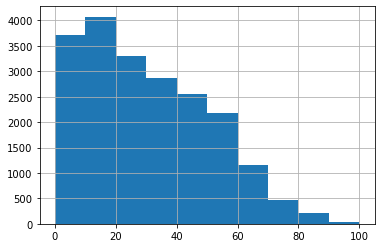

In [226]:
elca_2013_personas["edad"].hist()

In [231]:
elca_2013_personas["nivel_educ_2010"].value_counts()

Básica secundaria y media  (6 a 13)    3804
Básica primaria (1 a 5)                1212
Universitario sin título                513
Ninguno                                 261
Técnico con título                      248
Técnico sin título                      181
Universitario con título                171
Tecnológico sin título                   99
Tecnológico con título                   74
Preescolar                               65
Posgrado con título                      24
Posgrado sin título                      13
Name: nivel_educ_2010, dtype: int64

In [69]:
gastos_h_2013 = pd.read_stata("D:/maestria_ciencias_economicas_unal/tesis_scarring/base datos/ELCA_2013/ELCA_2013_urbano/UGastos_hogar.dta") 